Goethe Universität, FB 05 Psychologie

Wintersemester 2017/2018

PsyMSc 5: Python für Psychologen, Dr. Jona Sassenhagen

Anonym

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns

from scipy import stats
from glob import glob
from scipy.stats.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway as anova

In [2]:
all_dfs = list()
for ii, file in enumerate(glob("./csv/*")):  
    if file.endswith(".csv"):  
        try:
            df = pd.read_csv(file)
            all_dfs.append(df)
        except Exception:
            pass
df = pd.concat(all_dfs)

In [3]:
df

,subject,age,sex,house,nutella,movie,temperature,block,trial,cue_cond,...,cue_neutral_pos,cue_neutral_side,target_pos,target_side,duration,fixation,fixation_direction,response,correct,rt
0,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,0,Hässlichkeit,...,-200,left,-200,left,1.00,cross,None,x,True,0.600819
1,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,1,Zuverlässigkeit,...,-200,left,200,right,0.04,cross,None,m,True,0.498757
2,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,2,Zufriedenheit,...,-200,left,200,right,1.00,cross,None,m,True,0.501401
3,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,3,Einsamkeit,...,-200,left,-200,left,0.04,cross,None,x,True,0.523981
4,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,4,Erfolg,...,-200,left,200,right,0.04,cross,None,m,True,0.454894
5,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,5,Beliebtheit,...,200,right,-200,left,0.04,cross,None,x,True,0.580678
6,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,6,Wut,...,200,right,-200,left,1.00,cross,None,x,True,0.460070
7,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,7,Neid,...,-200,left,-200,left,1.00,cross,None,x,True,0.334463
8,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,8,Anschlag,...,200,right,200,right,0.04,cross,None,m,True,0.362122
9,NvR,44,weiblich,Hufflepuff,die,Der Pate,39,0,9,Tod,...,-200,left,-200,left,0.04,cross,None,x,True,0.365608


# kicking out outliers

invalid trials

In [4]:
df= df.query("rt != -999") # kicking out invalid trials (without response)
df

list_all_results = [] # list in which all results are stored
list_discussion = [] # list in which all significant effects are stored


accuracy-outliers

In [5]:
# exclusion of all subjects with an accuracy below 90 %
bad_subj = []
for subj in df["subject"].unique():
    if df.query("subject == @subj").mean()["correct"] < 0.90:
        bad_subj.append(subj)
    else:
        continue

df = df.query("subject not in @bad_subj") 

print("Following subjects are excluded from further analysis because their mean accuracy is below 90 %: ", bad_subj)    



Following subjects are excluded from further analysis because their mean accuracy is below 90 %:  ['PFE', 'BWa']


In [6]:
# mean rt etc. for each subject
subject_means_all = df.groupby("subject").mean()
subject_means_all
overall_mean = subject_means_all["rt"].mean()
print("mean rt overall:", overall_mean)
overall_sd = subject_means_all["rt"].std()
print("sd rt overall:", overall_sd)

mean rt overall: 0.41046621244240883
sd rt overall: 0.07144027408092143


rt/accuracy distribution

/Users/jona/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'accuracy')

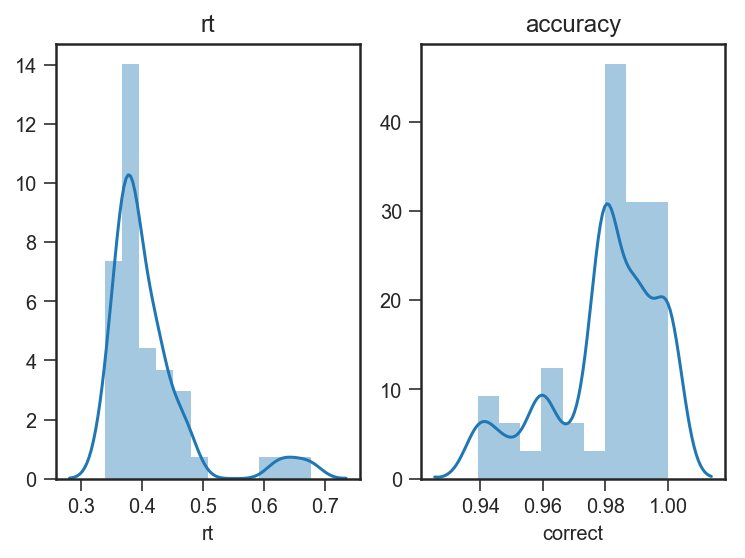

In [7]:
fig, axs = mpl.pyplot.subplots(ncols = 2)

sns.distplot(subject_means_all["rt"], ax = axs[0]).set_title("rt")
sns.distplot(subject_means_all["correct"], ax = axs[1]).set_title("accuracy")

Text(0.5,1,'accuracy')

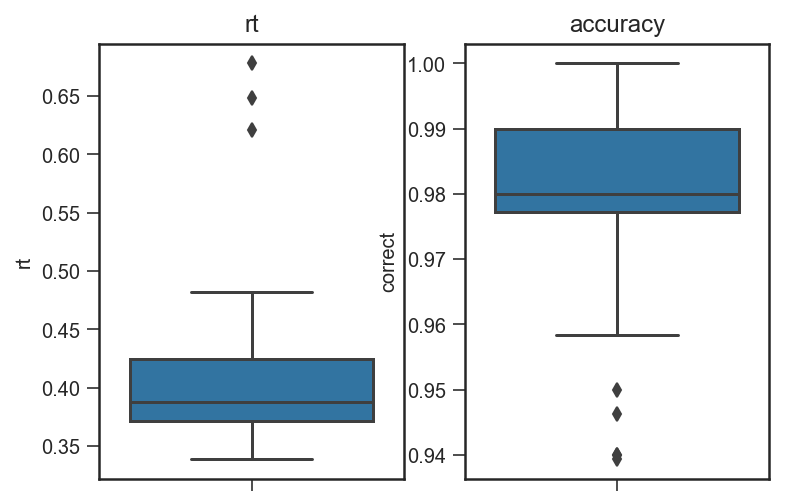

In [8]:
fig, axs = mpl.pyplot.subplots(ncols = 2)

sns.boxplot(y = subject_means_all["rt"], ax = axs[0]).set_title("rt")
sns.boxplot(y = subject_means_all["correct"], ax = axs[1]).set_title("accuracy")

# creating subset for only one house of hogwarts

In [9]:
# further analysis will be performed only on data of this certain house
house = "Ravenclaw" 
df = df.query("house == @house")
subject_means_all = df.groupby("subject").mean()

# descriptive analysis

age, temperature

In [10]:
# maximum, minimum, mean, standard deviation for age and temperature
list_age_temp = ["age", "temperature"]
for col in list_age_temp:
    mean = subject_means_all[col].mean()
    sd = subject_means_all[col].std()
    max_ = subject_means_all[col].max()
    min_ = subject_means_all[col].min()
    
    print( """{} is in a range from {} to {}.  Mean {} is {} with a standard deviation of {}.""" 
          .format(col, min_, max_, col, round(mean,2), round(sd,2)),"\n")
    

age is in a range from 18.0 to 50.0.  Mean age is 26.4 with a standard deviation of 9.56. 

temperature is in a range from 35.0 to 40.0.  Mean temperature is 37.8 with a standard deviation of 1.99. 



valence

In [11]:
# creates new column with neutral/positive/negative for trials in which target appeared on the side of the neutral/positive/negative target
# boolean version doesn´t work because variable isn´t dichotomous --> neutral, negative, positive

"""'
' *!!! Instructor Notes !!!*
The original student's code in following cell is correct, but unnecessarily slow (and not idiomatic Python/Pandas).
A much faster replacement has been added to not slow down code execution on slow computers.

original version:'

df["cong_side_val"] = "neutral"
for index, (neutral_side, target_side) in enumerate(zip(df["cue_neutral_side"],df["target_side"])):
    if neutral_side != target_side:
        df["cong_side_val"].iloc[index] = df["cue_valence"].iloc[index]    
df
"""

df["cong_side_val"] = df["cue_valence"]
df.loc[df["cue_neutral_side"] == df["target_side"], "cong_side_val"] = "neutral"

mean_rt_neutral: 0.48776626271175855 sd_rt_neutral: 0.1272968803051386
mean_rt_positive: 0.4588046548175516 sd_rt_positive: 0.09559815329009926
mean_rt_negative: 0.47362916479053474 sd_rt_negative: 0.09403062648683831


/Users/jona/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'negative')

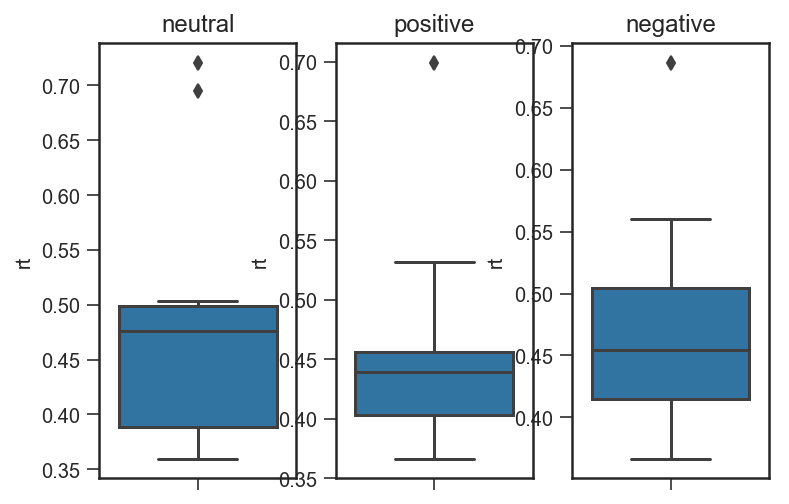

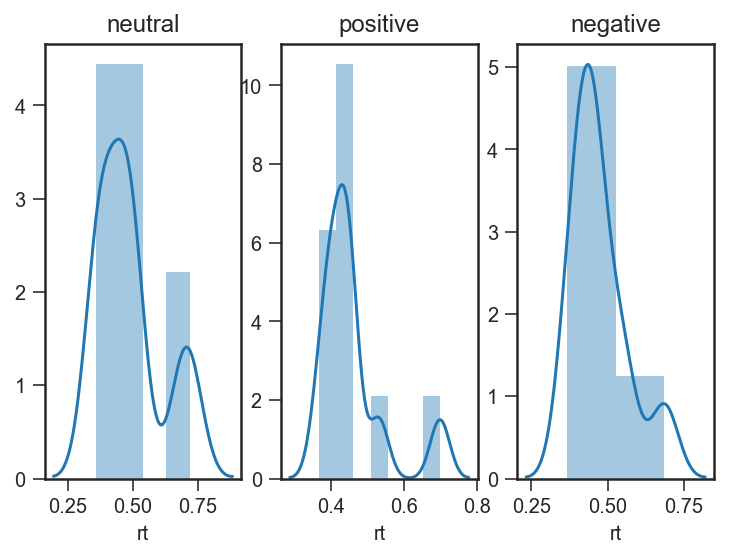

In [12]:
# mean rts for the newly defined valence categories

sub_neutral = df.query("cong_side_val =='neutral'")
sub_positive = df.query("cong_side_val == 'positive'")
sub_negative = df.query("cong_side_val == 'negative'")

subj_neutral_means = sub_neutral.groupby("subject").mean()["rt"]
subj_positive_means = sub_positive.groupby("subject").mean()["rt"]
subj_negative_means = sub_negative.groupby("subject").mean()["rt"]


print("mean_rt_neutral:",subj_neutral_means.mean(),"sd_rt_neutral:",subj_neutral_means.std())
print("mean_rt_positive:",subj_positive_means.mean(),"sd_rt_positive:",subj_positive_means.std())
print("mean_rt_negative:",subj_negative_means.mean(), "sd_rt_negative:",subj_negative_means.std())


# plotting rts to to have a look at the distribution 
fig, axs = mpl.pyplot.subplots(ncols = 3)

sns.boxplot(y = subj_neutral_means, ax = axs[0]).set_title("neutral")
sns.boxplot(y = subj_positive_means, ax = axs[1]).set_title("positive")
sns.boxplot(y = subj_negative_means, ax = axs[2]).set_title("negative")


fig, axs = mpl.pyplot.subplots(ncols = 3)

sns.distplot(subj_neutral_means, ax = axs[0]).set_title("neutral")
sns.distplot(subj_positive_means, ax = axs[1]).set_title("positive")
sns.distplot(subj_negative_means, ax = axs[2]).set_title("negative")


cross vs. finger-hole

mean_rt_cross: 0.4865633714587525 sd_rt_cross: 0.11670072598154733
mean_rt_hole: 0.4655132163693925 sd_rt_hole: 0.09877316156649528


/Users/jona/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'hole')

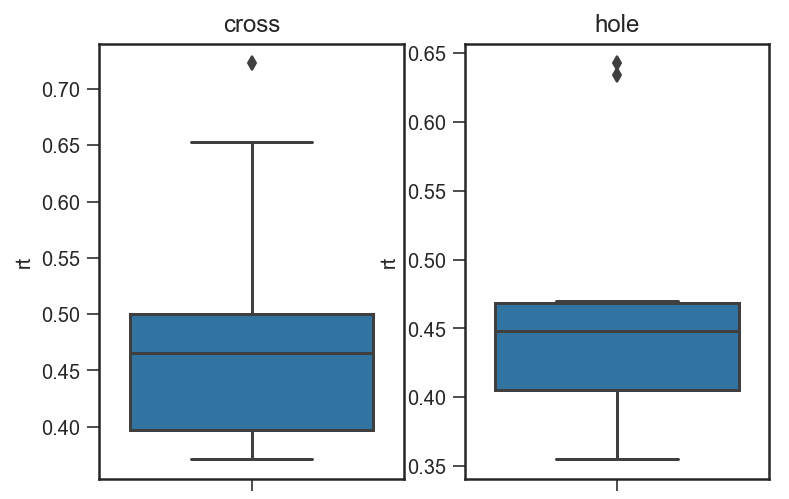

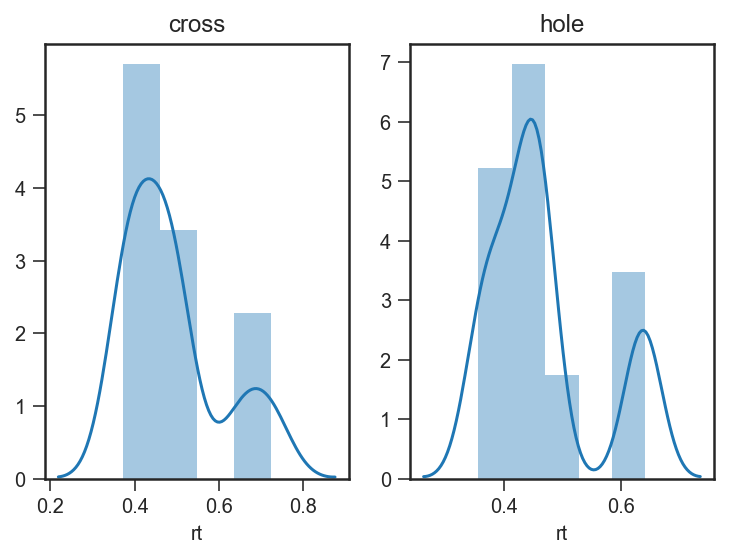

In [13]:
# mean rts for fixation sign categories
sub_cross = df.query("fixation == 'cross'")
sub_hole = df.query("fixation == 'hole'")

subj_cross_means = sub_cross.groupby("subject").mean()["rt"]
subj_hole_means = sub_hole.groupby("subject").mean()["rt"]

print("mean_rt_cross:",subj_cross_means.mean(),"sd_rt_cross:",subj_cross_means.std())
print("mean_rt_hole:",subj_hole_means.mean(),"sd_rt_hole:",subj_hole_means.std())


# plotting rt distribution for finger vs. cross trials 
fig, axs = mpl.pyplot.subplots(ncols = 2)
sns.boxplot(y = subj_cross_means,  ax = axs[0]).set_title("cross")
sns.boxplot(y = subj_hole_means, ax = axs[1]).set_title("hole")

fig, axs = mpl.pyplot.subplots(ncols = 2)
sns.distplot(subj_cross_means, ax = axs[0]).set_title("cross")
sns.distplot(subj_hole_means, ax = axs[1]).set_title("hole")


Distributions regarding valence and fixation sign seem to be slightly right-skewed.
We assume that this also goes for the other subsets involved in further analysis...

# further checking of normal distribution

rt

In [14]:
# creates series with mean rt/age/accuracy per subject

mean_rt_subj = subject_means_all["rt"]
mean_age_subj = subject_means_all["age"]
mean_accuracy_subj = subject_means_all["correct"]

In [15]:
# Kolmogorov Smirnov test to check on whether rts are normally distributed over all trials
# we won't repeat this for each subset involved in further analysis...
means = [mean_rt_subj, mean_age_subj, mean_accuracy_subj]
variable = ["RT", "age", "accuracy"]

for m, var in zip(means, variable):
    
    ks, p = stats.kstest(m, "norm")
    print( "According to the Kolmogorov-Smirnov test the distribution of {} is ".format(var) +("not normal." if p < 0.05 else "normal.")+ "( ks =",ks, ", p =", p, ").")
    if p < 0.05:
        print("Though according to KS-test {} is not normally distributed we do not think that normal distribution is violated in a way that exceeds the robustness of the used statistical methods.".format(var),"\n")
    

According to the Kolmogorov-Smirnov test the distribution of RT is not normal.( ks = 0.641841412415457 , p = 0.0001541930901931554 ).
Though according to KS-test RT is not normally distributed we do not think that normal distribution is violated in a way that exceeds the robustness of the used statistical methods. 

According to the Kolmogorov-Smirnov test the distribution of age is not normal.( ks = 1.0 , p = 0.0 ).
Though according to KS-test age is not normally distributed we do not think that normal distribution is violated in a way that exceeds the robustness of the used statistical methods. 

According to the Kolmogorov-Smirnov test the distribution of accuracy is not normal.( ks = 0.826235738238313 , p = 5.1260444999812194e-08 ).
Though according to KS-test accuracy is not normally distributed we do not think that normal distribution is violated in a way that exceeds the robustness of the used statistical methods. 



# inference statistic

# correlations




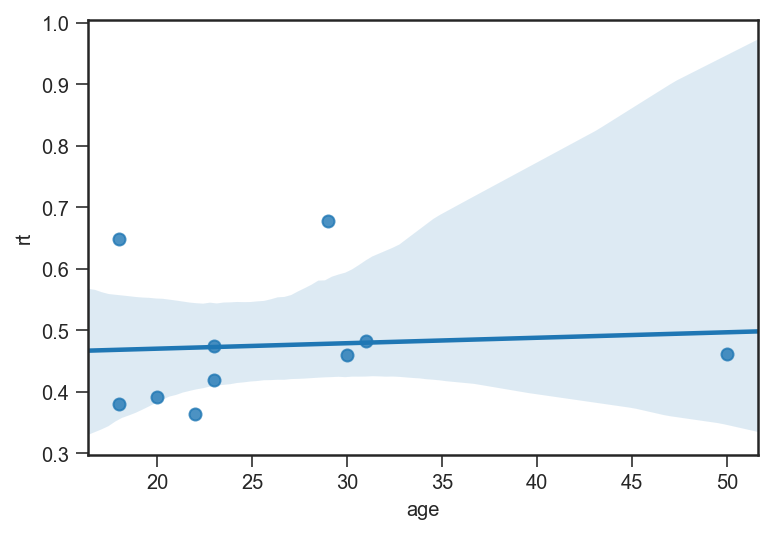

In [16]:
scatter_age_rt = sns.regplot(x= mean_age_subj, y= mean_rt_subj)
scatter_age_rt

homoscedasticity should be more or less given

In [17]:
# correlation rt and age
r, p = pearsonr(mean_rt_subj, mean_age_subj)

statistic = ("r=",r,"p=",p)
result = ("RT and age " + ("do" if p < .05 else "do not") + " correlate significantly.")

list_all_results.append([result, statistic])

if p < .05:
    list_discussion.append("a correlation of reaction time and age")


print(result)
print(statistic)


RT and age do not correlate significantly.
('r=', 0.07935323673151805, 'p=', 0.8275037260628476)


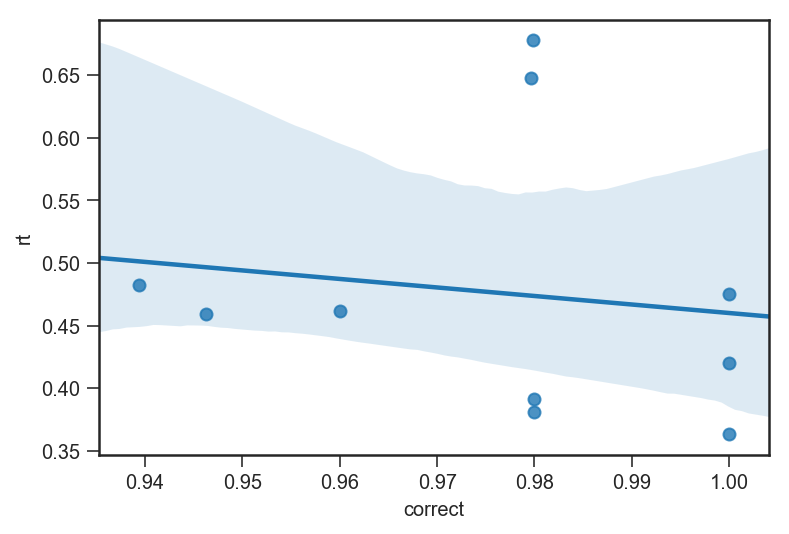

In [18]:
scatter_acc_rt = sns.regplot(x= mean_accuracy_subj, y= mean_rt_subj)
scatter_acc_rt

homoscedasticity....

In [19]:
# correlation rt and accuracy

r, p = pearsonr(mean_rt_subj, mean_accuracy_subj)

statistic = ("r=",r,"p=",p)
result = ("RT and accuracy " + ("do" if p < .05 else "do not") + " correlate significantly.")

list_all_results.append([result, statistic])

if p < .05:
    list_discussion.append("a correlation of reaction time and accuracy")


print(result)
print(statistic)

RT and accuracy do not correlate significantly.
('r=', -0.1386513460665978, 'p=', 0.7024639291665586)


# t-tests

In [20]:
# temperature for each subject in a df with mean rt, median serves as cutoff for cold/warm 
mean_rts_temp= df.groupby(["subject", "temperature"]).mean()["rt"].to_frame()

temp_cutoff = df.groupby("subject").mean()["temperature"].median()
print("cut-off for temperature:",temp_cutoff, "Celsius Degree")



cut-off for temperature: 38.0 Celsius Degree


In [21]:
# creating warm/cold subsets according to cutoff and checking on homoscedasticity
cold = mean_rts_temp.query("temperature < @temp_cutoff")["rt"] 
warm = mean_rts_temp.query("temperature >= @temp_cutoff")["rt"]

mean_rt_cold= cold.mean()
mean_rt_warm = warm.mean()

lev, p = stats.levene(cold, warm)
message = "According to the Levene test homogenity of variance is"
print(message, "not given" if p < 0.05 else "given.", "( p =", p,")")

According to the Levene test homogenity of variance is given. ( p = 0.18648246217817396 )


In [22]:
# ttest for differences in rt between people preferring cold/warm water

t,p = ttest_ind(cold,warm)

statistic = ("t=",t,"p=",p)
result = ("RTs between people preferring cold and people preferring warm water " 
          + ("do" if p < .05 else "do not") + " differ significantly.")

print(result)
print(statistic)

if p< .05:
    result_2 = ("""People preferring cold water (mean rt = {} s) react """.format(round(mean_rt_cold, 2))  
                + ("quicker " if mean_rt_cold < mean_rt_warm else "slowlier ")+ 
                """than people preferring warm water (mean rt =", {} s").""".format(round(mean_rt_warm, 2)))
    list_all_results.append([result, statistic, result_2])
    list_discussion.append("the preferred shower temperature")

    print(result_2)

else:
    list_all_results.append([result, statistic])

RTs between people preferring cold and people preferring warm water do not differ significantly.
('t=', -0.814984383755045, 'p=', 0.43866794158575717)


cross vs. finger-hole

In [23]:
# creating subsets for ttest and checking on homoscedasticity

finger_hole_rts = df.query("fixation == 'hole'")
cross_rts = df.query("fixation == 'cross'")

finger_mean_rts_subj = finger_hole_rts.groupby("subject").mean()["rt"] # mean rt in trials with finger-hole for each subject 
cross_mean_rts_subj = cross_rts.groupby("subject").mean()["rt"]

mean_rt_finger = finger_mean_rts_subj.mean()
mean_rt_cross = cross_mean_rts_subj.mean()

lev, p = stats.levene(finger_mean_rts_subj, cross_mean_rts_subj)
message = "According to the Levene test homogenity of variance is"
print(message, "not given" if p < 0.05 else "given.", "( p =", p,")")

According to the Levene test homogenity of variance is given. ( p = 0.633475628263116 )


In [24]:
# checking on whether rt differs between trials with cross and trials with finger hole as fixation sign

t,p = ttest_ind(finger_mean_rts_subj, cross_mean_rts_subj)

statistic = ("t=",t,"p=",p)
result = ("RTs for different kinds of fixation-signs(cross vs. finger-hole) " + ("do" if p < .05 else "do not") 
          + " differ significantly.")

print(result)
print(statistic)

if p< .05:
    result_2 = ("""Subjects react """  + ("quicker " if mean_rt_cold < mean_rt_warm else "slowlier ")+ 
                """when the fixation-sign is a finger-hole (mean rt = {} ms)""".format(round(mean_rt_finger, 2))
                +""" than when it is a cross (mean rt =", {} ms")""".format(round(mean_rt_cross, 2)))
    list_all_results.append([result, statistic, result_2])
    list_discussion.append("the kind of the fixation sign")
    print(result_2)

else:
    list_all_results.append([result, statistic]) 

RTs for different kinds of fixation-signs(cross vs. finger-hole) do not differ significantly.
('t=', -0.4353892091035553, 'p=', 0.6684558500692794)


finger-direction congruent with target-side vs. incongruent

In [25]:
# creating a new column/variable which is "congruent" when fixation direction is congruent with target side or "incongruent" respectively
# boolean version doesn´t work since the variable isn´t dichotomous--> incongruent, congruent, None(trials with cross-fixation)

"""'
' *!!! Instructor Notes !!!*
Again, the original student's code in following cell is correct, but unnecessarily slow and unidiomatic.
A much faster replacement has been added to not slow down code execution on slow computers.

original version:'

df["cong_side_fix_dir"] = "incongruent"
for index, (fixation_direction, target_side) in enumerate(zip(df["fixation_direction"],df["target_side"])):
    if (fixation_direction == target_side):
        df["cong_side_fix_dir"].iloc[index] = "congruent"
    elif fixation_direction == "None":
        df["cong_side_fix_dir"].iloc[index] = df["fixation_direction"].iloc[index]   
df
"""

def mapper(columns):
    fixation_direction, target_side = columns
    if fixation_direction == None:
        return fixation_direction    
    elif fixation_direction == target_side:
        return "congruent"
    else:
        return "incongruent"

df["cong_side_fix_dir"] = df[["fixation_direction", "target_side"]].apply(mapper, axis=1)

In [26]:
# creating subsets for ttest and checking on homoscedasticity
hole_dir_cong_rts = df.query("target_side == fixation_direction")
hole_dir_incong_rts = df.query("target_side != fixation_direction and fixation_direction != None")

hole_dir_cong_rts_subj = hole_dir_cong_rts.groupby("subject").mean()["rt"] # mean rt in trials with congruent traget side and finger direction for each subject 
hole_dir_incong_rts_subj = hole_dir_incong_rts.groupby("subject").mean()["rt"]

lev, p = stats.levene(hole_dir_cong_rts_subj, hole_dir_incong_rts_subj)
message = "According to the Levene test homogenity of variance is"
print(message, "not given" if p < 0.05 else "given.", "( p =", p,")")

According to the Levene test homogenity of variance is given. ( p = 0.9421210871464483 )


In [27]:
# checks on whether rt for trials in which finger-hole-direction and target side are congruent differs from rt of incongruent trials
t,p = ttest_ind(hole_dir_cong_rts_subj, hole_dir_incong_rts_subj)

statistic = ("t=",t,"p=",p)
result = ("RTs for trials in which finger-hole-direction and target-side are congruent or incongruent respectively " + ("do" if p < .05 else "do not") + " differ significantly.")

list_all_results.append([result, statistic])

if p < .05:
    list_discussion.append("congruence of finger-hole direction and target side")

print(result)
print(statistic)



RTs for trials in which finger-hole-direction and target-side are congruent or incongruent respectively do not differ significantly.
('t=', -0.2047456390774738, 'p=', 0.8400682473735868)


# ANOVA

neutral vs. positive vs. negative (overall, 40 ms, 1000 ms)

data preparation

In [28]:
# lists with mean rts for trials with negative/positive/neutral cue words that appeared on the same side as the target for each subject
durations = ["overall", 0.04, 1.00]

cong_valences = []
cong_valences_short = []
cong_valences_long = []

for dur in durations:
    for cond in ("neutral", "negative", "positive"):
        if dur == "overall":   
            rt_val = df.query("cong_side_val == '" + cond + "'")
            mean_rt_val_subj = rt_val.groupby("subject").mean()["rt"]
            cong_valences.append(mean_rt_val_subj)
        elif dur == 0.04:
            rt_val = df.query("cong_side_val == '" + cond + "' & duration == 0.04")
            mean_rt_val_subj = rt_val.groupby("subject").mean()["rt"]
            cong_valences_short.append(mean_rt_val_subj)
        else:
            rt_val = df.query("cong_side_val == '" + cond + "' & duration == 1.00")
            mean_rt_val_subj = rt_val.groupby("subject").mean()["rt"]
            cong_valences_long.append(mean_rt_val_subj)
            
neutral, negative, positive = cong_valences
neutral_short, negative_short, positive_short = cong_valences_short
neutral_long, negative_long, positive_long = cong_valences_long

In [29]:
# homoscedasticity...
valences = [[neutral, negative, positive], [neutral_short, negative_short, positive_short], [neutral_long, negative_long, positive_long]]
durations = ["(overall)", "(40 ms)", "(1000 ms)"]

for val, dur in zip(valences, durations):
    lev, p = stats.levene(val[0], val[1], val[2])
    print("According to the Levene test homogenity of variance is " + ("not given " if p < 0.05 else "given ") + "{}.(p = {})".format(dur, p))
              



According to the Levene test homogenity of variance is given (overall).(p = 0.5982930489589207)
According to the Levene test homogenity of variance is given (40 ms).(p = 0.6496000478955776)
According to the Levene test homogenity of variance is given (1000 ms).(p = 0.7508823763470642)


ANOVAs

In [30]:
# anovas to check on effects of valence (overall, 40 ms, 1000 ms)

for val, dur in zip(valences, durations):
    F, p = anova(val[0],val[1],val[2])
    statistic = ("F =", F,"p =", p)
    result = ("RTs to words with different valences (neutral, negative, positive) that are congruent with target side " + ("do" if p < .05 else "do not") + " differ significantly {}.".format(dur))
              
    list_all_results.append([result, statistic])

    if p < .05:
        list_discussion.append("the valence of cue words that were presented on the same side as the target {}".format(dur))

    print(result)
    print(statistic,"\n")


RTs to words with different valences (neutral, negative, positive) that are congruent with target side do not differ significantly (overall).
('F =', 0.18405568878648526, 'p =', 0.8329244873030427) 

RTs to words with different valences (neutral, negative, positive) that are congruent with target side do not differ significantly (40 ms).
('F =', 0.42049540046410283, 'p =', 0.6609483824816187) 

RTs to words with different valences (neutral, negative, positive) that are congruent with target side do not differ significantly (1000 ms).
('F =', 0.18739613894429216, 'p =', 0.8301844200043228) 



# overview over results / discussion

In [31]:
# overview results
for index in list_all_results:
    for i in index:
            print(i,"\n")
    print("\n")
    

    
    

RT and age do not correlate significantly. 

('r=', 0.07935323673151805, 'p=', 0.8275037260628476) 



RT and accuracy do not correlate significantly. 

('r=', -0.1386513460665978, 'p=', 0.7024639291665586) 



RTs between people preferring cold and people preferring warm water do not differ significantly. 

('t=', -0.814984383755045, 'p=', 0.43866794158575717) 



RTs for different kinds of fixation-signs(cross vs. finger-hole) do not differ significantly. 

('t=', -0.4353892091035553, 'p=', 0.6684558500692794) 



RTs for trials in which finger-hole-direction and target-side are congruent or incongruent respectively do not differ significantly. 

('t=', -0.2047456390774738, 'p=', 0.8400682473735868) 



RTs to words with different valences (neutral, negative, positive) that are congruent with target side do not differ significantly (overall). 

('F =', 0.18405568878648526, 'p =', 0.8329244873030427) 



RTs to words with different valences (neutral, negative, positive) that are congr

In [32]:
#discussion
length_all = len(list_all_results)
length = len(list_discussion)

print("We could obtain "+ ("no" if length == 0 else str(length)) + """ significant effect(s) among the students of {}""".format(house) 
     + (", which is at total odds with what is indicated by Rowling (1997,1998,1999,2000,2003,2005,2007,2016)." if length ==0 else "."))

    
if length > 1:
    last = list_discussion.pop()
    print("The obtained significant effects referred to"+ (",".join(list_discussion))+"and ", last,", which is indeed " 
          + ("perfectly in line with what we expected and the observations of Rowling (1997,1998,1999,2000,2003,2005,2007,2016)." if length == length_all else 
             "quite nice and compatible with the reports of Rowling(1997,1998,1999,2000,2003,2005,2007,2016)."))

elif length ==1:
    print("The obtained significant effect referred to "+ (",".join(list_discussion))+", which is indeed " 
          + ("perfectly in line with what we expected and the observations of Rowling (1997,1998,1999,2000,2003,2005,2007,2016)."))
    
else:
    print("\n","What a bummer...")

    
    

We could obtain no significant effect(s) among the students of Ravenclaw, which is at total odds with what is indicated by Rowling (1997,1998,1999,2000,2003,2005,2007,2016).

 What a bummer...


# Literature

Rowling, J. K. (1997). Harry Potter and the Philosopher's Stone: London: Bloomsbury.

Rowling, J. K. (1998). Harry Potter and the chamber of secrets: London: Bloomsbury.

Rowling, J. K. (1999). Harry Potter and the prisoner of Azkaban: London: Bloomsbury.

Rowling, J. K. (2000). Harry Potter and the goblet of fire: London: Bloomsbury.

Rowling, J. K. (2003). Harry Potter and the Order of the Phoenix: London: Bloomsbury.

Rowling, J. K. (2005). Harry Potter and the half-blood prince:  London: Bloomsbury.

Rowling, J. K. (2007). Harry Potter and the deathly hallows: London: Bloomsbury.

Rowling, J. K. (2016). Harry Potter and the cursed child: London: Bloomsbury.